<IPython.core.display.Javascript object>

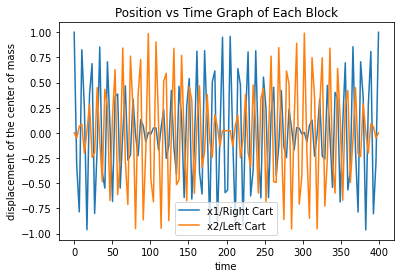

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import*

# coupled oscillating system constants 
sc1 = 10            # spring constant of right and left springs
sc2 = sc1/100    # spring constant of middle spring
m = 1             # mass of the carts

# finding period of oscillation to define timestep
K = np.array([[sc1+sc2, -sc2],
        [-sc2, sc1+sc2]])
M = np.array([[m, 0],
        [0, m]])
e = np.linalg.eigvals(K)
omega1, omega2 = (e[0]/m)**0.5, (e[1]/m)**0.5
omega0 = (omega1 + omega2)/2
epsilon = omega1 - omega0
T = 2*np.pi/(epsilon)

# analytical position graph of coupled oscillators
A = 1
t = np.linspace(0, T, 120) 
x1analytical = A*np.cos(epsilon*t)*np.cos(omega0*t)
x2analytical = A*np.sin(epsilon*t)*np.sin(omega0*t)

plt.plot(t, x1analytical, label = "x1/Right Cart")
plt.plot(t, x2analytical, label = "x2/Left Cart")

plt.title("Position vs Time Graph of Each Block")
plt.xlabel("time")
plt.ylabel("displacement of the center of mass")
plt.legend()
plt.show()

# solving a differential equation for weakly coupled oscillators
def g(u,t):
    x1 = u[0]
    x2 = u[1]
    v1 = u[2]
    v2 = u[3]
    fx1 = v1
    fx2 = v2
    fv1 = (-(sc1+sc2)*x1+sc2*x2)/m
    fv2 = (sc2*x1-(sc2+sc1)*x2)/m

    return np.array([fx1, fx2, fv1, fv2], float)

# initial conditions
x10 = 5.0
x20 = 0.0
v10 = 0.0
v20 = 0.0

u = np.array([x10, x20, v10, v20])

# postion graph set-up
graph(xtitle="Time", ytitle="Position")
x1line = gcurve(color = color.yellow,label="Position of Right Cart", interval=1)
x2line = gcurve(color = color.red,label="Position of Left Cart", interval=1)

# simulation scene set-up
length = 8
scene1 = canvas(title='Weakly- Coupled oscillators', width=400, height=200, center=vector(0,0,0), background=color.white) 
wall_right=box(pos=vector(3*length,0,0), velocity=vector(0,0,0), height=2*length, width=1/10, color=color.black)
wall_left=box(pos=vector(-3*length,0,0), velocity=vector(0,0,0), height=2*length, width=1/10, color=color.black)
cart_right=box(pos=vector(length,0,0), velocity=vector(0,0,0),mass=m, length = 5, width = 5, height = 5, color=color.green)
cart_left=box(pos=vector(-length,0,0), velocity=vector(0,0,0),mass=m, length = 5, width = 5, height = 5, color=color.blue)
spring_right=helix(pos=wall_right.pos,axis=-cart_right.pos, coils = 5,thickness=0.25,radius=1.5, color = color.red)
spring_middle=helix(pos=cart_right.pos, axis=2*cart_left.pos, coils = 5, thickness = 0.25, radius = 1.5, color = color.red)
spring_left=helix(pos=cart_left.pos,axis=.5*wall_left.pos, coils = 5,thickness=0.25,radius=1.5, color = color.red)
cart_right_right_wheel=cylinder(axis=vector(0,0,1),  pos=cart_right.pos+vector(.25, -.5, 0), radius=1, color=color.green)
cart_right_left_wheel=cylinder(axis=vector(0,0,1),  pos=cart_right.pos+vector(-.25, -.5, 0), radius=1, color=color.green)
cart_left_right_wheel=cylinder(axis=vector(0,0,1), pos=cart_left.pos+vector(.25, -.5, 0), radius=1, color=color.blue)
cart_left_left_wheel=cylinder(axis=vector(0,0,1), pos=cart_left.pos+vector(-.25, -.5, 0), radius=1, color=color.blue)

# simulation
running = True
t = 0
dt = T/5000
while running == True:
    rate(50)
    
    # runge-kutta method
    k1 = dt * g(u, t)    
    k2 = dt * g(u + 0.5 * k1, t + 0.5*dt)
    k3 = dt * g(u + 0.5 * k2, t + 0.5*dt)
    k4 = dt * g(u + k3, t + 0.5*dt)
    u += (k1 + 2*(k2 + k3) + k4) / 6
    
     # updating cart and spring positions
    x1 = u[0]
    x2 = u[1]
   
    cart_right.pos = vector(length+x1,0,0)
    cart_left.pos = vector(-length+x2,0,0)
    spring_right.axis = cart_right.pos - wall_right.pos
    spring_middle.axis = cart_left.pos - cart_right.pos
    spring_middle.pos = cart_right.pos
    spring_left.pos = cart_left.pos
    spring_left.axis = wall_left.pos - cart_left.pos
    cart_right_right_wheel.pos=cart_right.pos+vector(1.75, -2.5, -.5)
    cart_right_left_wheel.pos=cart_right.pos+vector(-.75, -2.5, -.5)
    cart_left_right_wheel.pos=cart_left.pos+vector(.75, -2.5, -.5)
    cart_left_left_wheel.pos=cart_left.pos+vector(-1.75, -2.5, -.5)
    
    #update graph
    x1line.plot(t,x1)
    x2line.plot(t,x2)
    
    if t >= T:
        running = False
    
    t += dt

In [ ]:
# driving force parameters
# driving force was periodically applied to the right cart
def adjustForce():
    global F
    forceSliderReadout.text = forceSlider.value
    F = forceSlider.value
    
def adjustOmega():
    global omega
    omegaSliderReadout.text = omegaSlider.value
    omega = omegaSlider.value
    
F = 0
omega = omega0

# solving a differential equation for weakly coupled oscillators
def g(u,t):
    x1 = u[0]
    x2 = u[1]
    v1 = u[2]
    v2 = u[3]
    fx1 = v1
    fx2 = v2
    fv1 = (F*np.cos(omega*t)-(sc1+sc2)*x1+sc2*x2)/m
    fv2 = (sc2*x1-(sc2+sc1)*x2)/m

    return np.array([fx1, fx2, fv1, fv2], float)

# initial conditions
x10 = 0.0
x20 = 0.0
v10 = 0.0
v20 = 0.0

u = np.array([x10, x20, v10, v20])

# postion graph set-up
graph(xtitle="Time", ytitle="Position")
x1line = gcurve(color = color.yellow,label="Position of Right Cart", interval=1)
x2line = gcurve(color = color.red,label="Position of Left Cart", interval=1)

# simulation scene set-up
length = 8
scene2 = canvas(title='Weakly- Coupled oscillators with a Driving Force', width=400, height=200, center=vector(0,0,0), background=color.white) 
wall_right=box(pos=vector(3*length,0,0), velocity=vector(0,0,0), height=2*length, width=1/10, color=color.black)
wall_left=box(pos=vector(-3*length,0,0), velocity=vector(0,0,0), height=2*length, width=1/10, color=color.black)
cart_right=box(pos=vector(length,0,0), velocity=vector(0,0,0),mass=m, length = 5, width = 5, height = 5, color=color.green)
cart_left=box(pos=vector(-length,0,0), velocity=vector(0,0,0),mass=m, length = 5, width = 5, height = 5, color=color.blue)
spring_right=helix(pos=wall_right.pos,axis=-cart_right.pos, coils = 5,thickness=0.25,radius=1.5, color = color.red)
spring_middle=helix(pos=cart_right.pos, axis=2*cart_left.pos, coils = 5, thickness = 0.25, radius = 1.5, color = color.red)
spring_left=helix(pos=cart_left.pos,axis=.5*wall_left.pos, coils = 5,thickness=0.25,radius=1.5, color = color.red)
cart_right_right_wheel=cylinder(axis=vector(0,0,1),  pos=cart_right.pos+vector(.25, -.5, 0), radius=1, color=color.green)
cart_right_left_wheel=cylinder(axis=vector(0,0,1),  pos=cart_right.pos+vector(-.25, -.5, 0), radius=1, color=color.green)
cart_left_right_wheel=cylinder(axis=vector(0,0,1), pos=cart_left.pos+vector(.25, -.5, 0), radius=1, color=color.blue)
cart_left_left_wheel=cylinder(axis=vector(0,0,1), pos=cart_left.pos+vector(-.25, -.5, 0), radius=1, color=color.blue)

# Force control
forceSlider = slider(left=10, min=0, max=50, step=0.05, value=1.0, bind=adjustForce)
scene2.append_to_caption("     Driving Force = ")
forceSliderReadout = wtext(text="%.1f" % F)
scene2.append_to_caption("\n\n")

# Omega control
omegaSlider = slider(left = 10, bottom = 10, min=0, max=omega0, step=0.05, value=1.0, bind=adjustOmega)
scene2.append_to_caption("     Angular Frequency of Driving Force = ")
omegaSliderReadout = wtext(text="%.1f" %omega)
scene2.append_to_caption("\n\n")

# simulation
running = True
t = 0
dt = T/5000
while running == True:
    rate(50)
    
    # runge-kutta method
    k1 = dt * g(u, t)    
    k2 = dt * g(u + 0.5 * k1, t + 0.5*dt)
    k3 = dt * g(u + 0.5 * k2, t + 0.5*dt)
    k4 = dt * g(u + k3, t + 0.5*dt)
    u += (k1 + 2*(k2 + k3) + k4) / 6
    
     # updating cart and spring positions
    x1 = u[0]
    x2 = u[1]
   
    cart_right.pos = vector(length+x1,0,0)
    cart_left.pos = vector(-length+x2,0,0)
    spring_right.axis = cart_right.pos - wall_right.pos
    spring_middle.axis = cart_left.pos - cart_right.pos
    spring_middle.pos = cart_right.pos
    spring_left.pos = cart_left.pos
    spring_left.axis = wall_left.pos - cart_left.pos
    cart_right_right_wheel.pos=cart_right.pos+vector(1.75, -2.5, -.5)
    cart_right_left_wheel.pos=cart_right.pos+vector(-.75, -2.5, -.5)
    cart_left_right_wheel.pos=cart_left.pos+vector(.75, -2.5, -.5)
    cart_left_left_wheel.pos=cart_left.pos+vector(-1.75, -2.5, -.5)
    
    #update graph
    x1line.plot(t,x1)
    x2line.plot(t,x2)
    
    if t >= T:
        running = False
    
    if length+x1 <= -length+x2:   #to stop the simulation when the carts from hit each other
        running = False
    
    t += dt